In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
import scipy.stats as stats

from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)



In [2]:
COLS1 = [
    'HasDetections',
    'AVProductStatesIdentifier','AVProductsInstalled', 'AVProductsEnabled'
]
COLS2 = [
    'HasDetections',
    'Platform',
    'OsBuild'
]
COLS3 = [
    'HasDetections',
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Processor'
]
COLS4 = [
    'HasDetections',
    'IsBeta',
    'ProductName'
]
COLS5 = [
    'HasDetections',
    'GeoNameIdentifier',
    'CountryIdentifier'
]

In [3]:
train_1 = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS1)
train_2 = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS2)
train_3 = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS3)
train_4 = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS4)
train_5 = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS5)

In [4]:
train_1.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasDetections
0,53447.0,1.0,1.0,0
1,53447.0,1.0,1.0,0
2,53447.0,1.0,1.0,0
3,53447.0,1.0,1.0,1
4,53447.0,1.0,1.0,1


In [28]:
train_1.describe()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasDetections
count,8.885262e+06,8.885262e+06,8.885262e+06,8.921483e+06
mean,4.784001e+04,1.326779e+00,1.020967e+00,4.997927e-01
std,1.403237e+04,5.229272e-01,1.675544e-01,5.000000e-01
min,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.948000e+04,1.000000e+00,1.000000e+00,0.000000e+00
50%,5.344700e+04,1.000000e+00,1.000000e+00,0.000000e+00
75%,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00
max,7.050700e+04,7.000000e+00,5.000000e+00,1.000000e+00


In [5]:
train_2.head()

,Platform,OsBuild,HasDetections
0,windows10,17134,0
1,windows10,17134,0
2,windows10,17134,0
3,windows10,17134,1
4,windows10,17134,1


In [29]:
train_2.describe()

,OsBuild,HasDetections
count,8.921483e+06,8.921483e+06
mean,1.571997e+04,4.997927e-01
std,2.190685e+03,5.000000e-01
min,7.600000e+03,0.000000e+00
25%,1.506300e+04,0.000000e+00
50%,1.629900e+04,0.000000e+00
75%,1.713400e+04,1.000000e+00
max,1.824400e+04,1.000000e+00


In [30]:
train_2.Platform.value_counts()

windows10      8618715
windows8        194508
windows7         93889
windows2016      14371
Name: Platform, dtype: int64

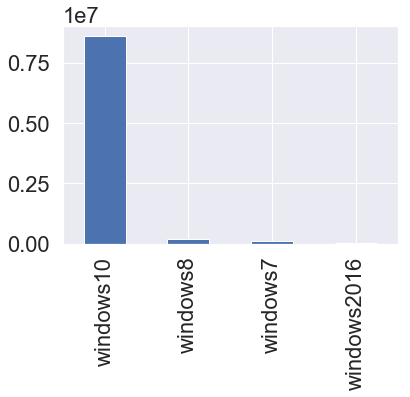

In [31]:
train_2.Platform.value_counts().plot(kind = 'bar')

Text(0.5,1,'bar chart of Platform')

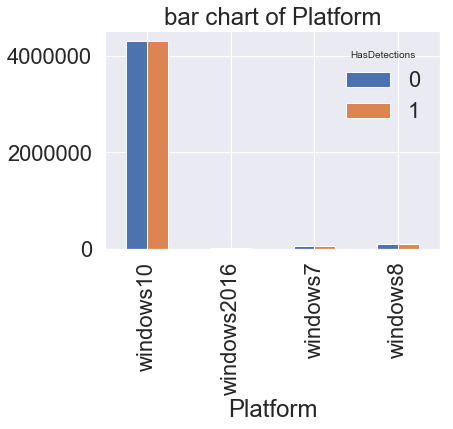

In [23]:
train_2.pivot_table(index = 'Platform', columns = 'HasDetections', aggfunc = 'size').plot(kind = 'bar')
plt.title('bar chart of {}'.format('Platform'))

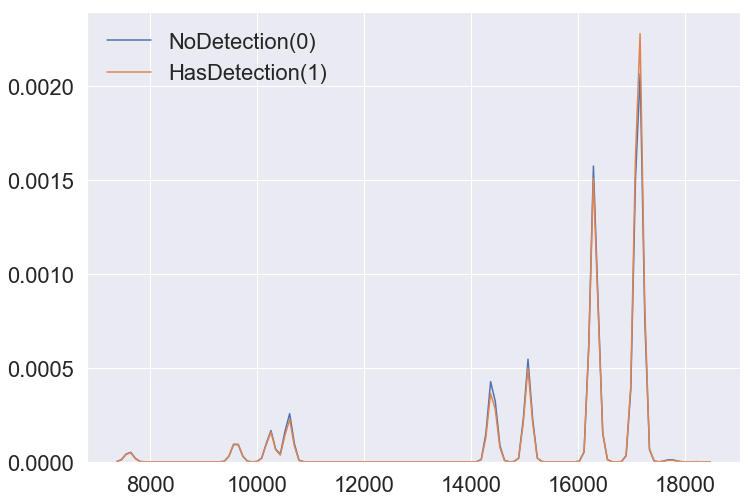

In [14]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.kdeplot(train_2.loc[train_2['HasDetections'] == 0, 'OsBuild'], label='NoDetection(0)')
sns.kdeplot(train_2.loc[train_2['HasDetections'] == 1, 'OsBuild'], label='HasDetection(1)')

In [9]:
train_3.head()

,Processor,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,HasDetections
0,x64,4.0,476940.0,0
1,x64,4.0,476940.0,0
2,x64,4.0,114473.0,0
3,x64,4.0,238475.0,1
4,x64,4.0,476940.0,1


In [32]:
train_3.describe()

,Census_ProcessorCoreCount,Census_PrimaryDiskTotalCapacity,HasDetections
count,8.880177e+06,8.868467e+06,8.921483e+06
mean,3.989696e+00,3.089053e+06,4.997927e-01
std,2.082553e+00,4.451634e+09,5.000000e-01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2.393720e+05,0.000000e+00
50%,4.000000e+00,4.769400e+05,0.000000e+00
75%,4.000000e+00,9.538690e+05,1.000000e+00
max,1.920000e+02,8.160437e+12,1.000000e+00


In [33]:
train_3.Processor.value_counts()

x64      8105435
x86       815702
arm64        346
Name: Processor, dtype: int64

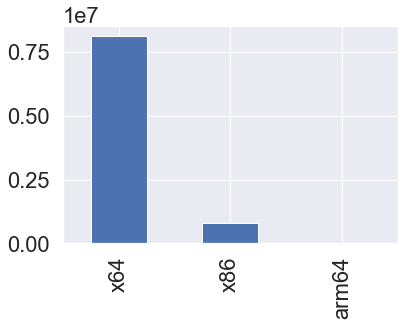

In [34]:
train_3.Processor.value_counts().plot(kind = 'bar')

Text(0.5,1,'bar chart of Processor')

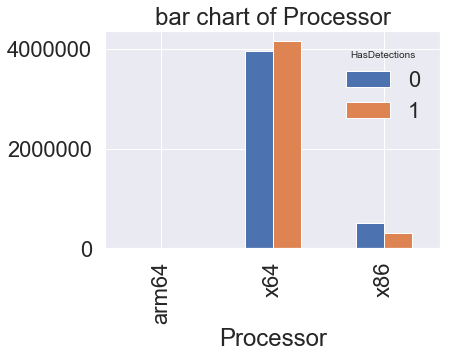

In [24]:
train_3.pivot_table(index = 'Processor', columns = 'HasDetections', aggfunc = 'size').plot(kind = 'bar')
plt.title('bar chart of {}'.format('Processor'))

Text(0.5,1,'KDE of Census_ProcessorCoreCount')

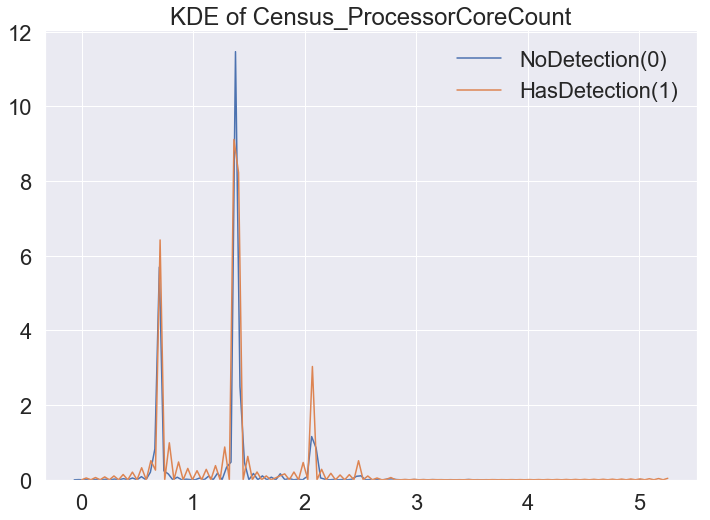

In [69]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.kdeplot(np.log(train_3.loc[train_3['HasDetections'] == 0, 'Census_ProcessorCoreCount']), label='NoDetection(0)')
sns.kdeplot(np.log(train_3.loc[train_3['HasDetections'] == 1, 'Census_ProcessorCoreCount']), label='HasDetection(1)')
plt.title('KDE of {}'.format('Census_ProcessorCoreCount'))

Text(0.5,1,'KDE of Census_PrimaryDiskTotalCapacity')

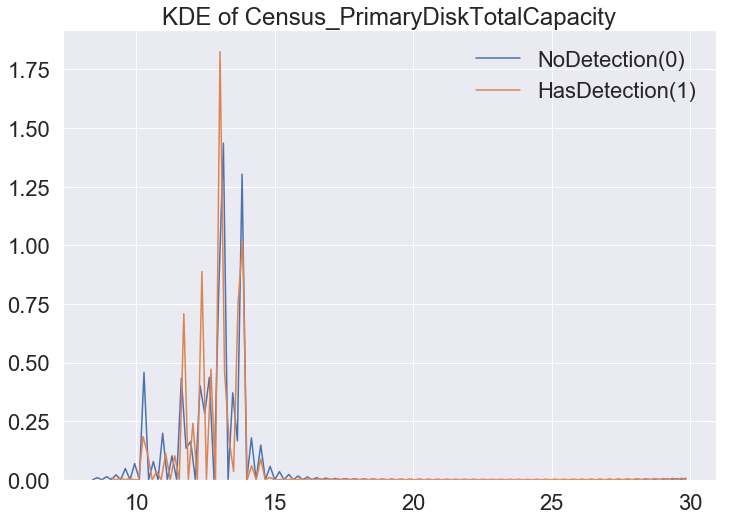

In [70]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.kdeplot(np.log(train_3.loc[train_3['HasDetections'] == 0, 'Census_PrimaryDiskTotalCapacity']), label='NoDetection(0)')
sns.kdeplot(np.log(train_3.loc[train_3['HasDetections'] == 1, 'Census_PrimaryDiskTotalCapacity']), label='HasDetection(1)')

plt.title('KDE of {}'.format('Census_PrimaryDiskTotalCapacity'))

In [71]:
log_train_3 = train_3.copy()
log_train_3['Census_PrimaryDiskTotalCapacity'] = np.log(log_train_3['Census_PrimaryDiskTotalCapacity'])

In [72]:
# 16TB = 16777216MB which is the largest capacity available, we use it as the cutoff to avoid outliers
np.log(16777216)

16.635532333438686

Text(0.5,1,'Boxplot of Census_PrimaryDiskTotalCapacity')

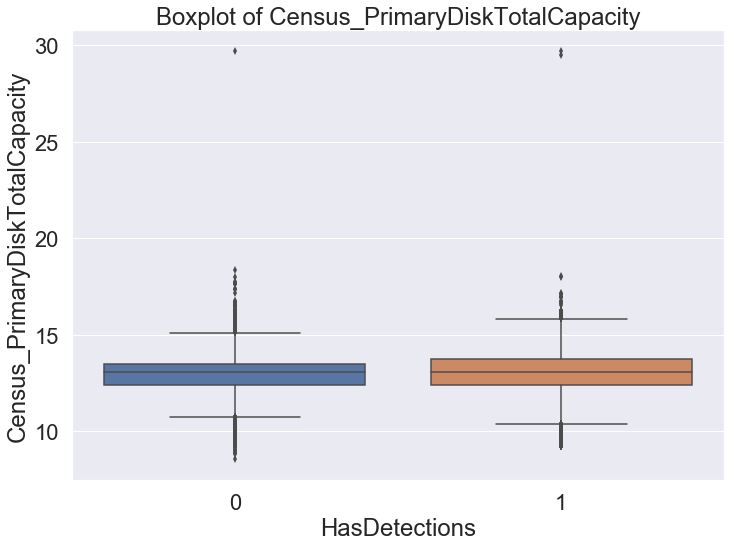

In [74]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(data=log_train_3, x='HasDetections', y='Census_PrimaryDiskTotalCapacity')

plt.title('Boxplot of {}'.format('Census_PrimaryDiskTotalCapacity'))

In [10]:
train_4.head()

,ProductName,IsBeta,HasDetections
0,win8defender,0,0
1,win8defender,0,0
2,win8defender,0,0
3,win8defender,0,1
4,win8defender,0,1


In [35]:
train_4.describe()

,IsBeta,HasDetections
count,8.921483e+06,8.921483e+06
mean,7.509962e-06,4.997927e-01
std,2.740421e-03,5.000000e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00


In [36]:
train_4.ProductName.value_counts()

win8defender     8826520
mse                94873
mseprerelease         53
scep                  22
windowsintune          8
fep                    7
Name: ProductName, dtype: int64

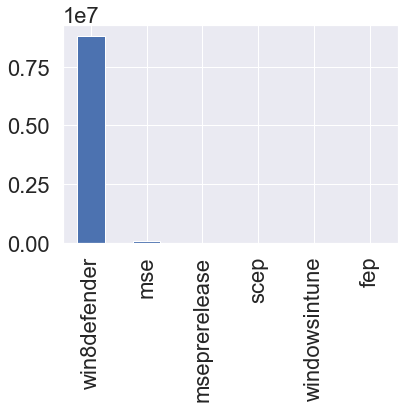

In [38]:
train_4.ProductName.value_counts().plot(kind = 'bar')

In [39]:
train_4.IsBeta.value_counts()

0    8921416
1         67
Name: IsBeta, dtype: int64

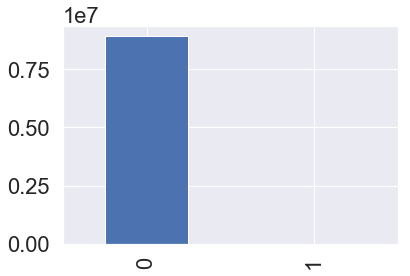

In [40]:
train_4.IsBeta.value_counts().plot(kind = 'bar')

Text(0.5,1,'bar chart of ProductName')

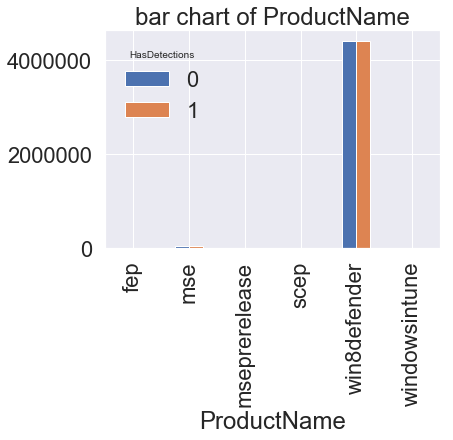

In [26]:
train_4.pivot_table(index = 'ProductName', columns = 'HasDetections', aggfunc = 'size').plot(kind = 'bar')
plt.title('bar chart of {}'.format('ProductName'))

Text(0.5,1,'bar chart of IsBeta')

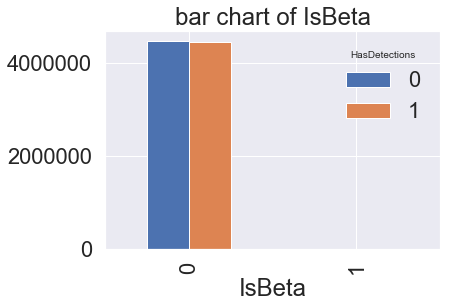

In [27]:
train_4.pivot_table(index = 'IsBeta', columns = 'HasDetections', aggfunc = 'size').plot(kind = 'bar')
plt.title('bar chart of {}'.format('IsBeta'))

In [ ]:
#special analysis of isbeta

In [46]:
len(train_4[ (train_4.HasDetections == 1) & (train_4.IsBeta == 1)]) / (len(train_4[ (train_4.IsBeta == 1)]))

0.4925373134328358

In [47]:
len(train_4[ (train_4.HasDetections == 1) & (train_4.IsBeta == 0)]) / (len(train_4[ (train_4.IsBeta == 0)]))

0.4997927459049102

In [48]:
# same, isbeta ignored

In [11]:
train_5.head()

,CountryIdentifier,GeoNameIdentifier,HasDetections
0,29,35.0,0
1,93,119.0,0
2,86,64.0,0
3,88,117.0,1
4,18,277.0,1


In [49]:
train_5.CountryIdentifier.value_counts()

43     397172
29     347991
141    333411
93     283625
171    280572
60     231981
201    220622
207    211645
66     208579
89     200516
97     195161
214    191269
158    184766
44     182707
9      172594
107    168997
41     160533
68     160158
51     159940
203    158058
35     140027
160    132251
142    131907
195    131685
149    129578
205    117245
155    110779
164    108549
173     94129
159     91592
        ...  
74        775
192       740
182       696
134       689
196       681
198       656
123       654
75        643
114       590
126       566
64        565
28        553
215       543
105       507
5         459
174       449
14        446
79        444
187       438
216       379
200       355
10        327
128       303
212       299
186       227
165       213
37        212
193       207
161       206
217       120
Name: CountryIdentifier, Length: 222, dtype: int64

In [54]:
train_5.CountryIdentifier.nunique()

222

In [55]:
#222 countries

In [53]:
train_5.GeoNameIdentifier.value_counts()

277.0    1531929
211.0     423166
53.0      408807
89.0      360798
240.0     346568
35.0      345904
167.0     339845
276.0     296774
267.0     215812
126.0     198021
98.0      184459
119.0     181876
138.0     172941
255.0     162193
57.0      155478
10.0      143023
52.0      140200
204.0     137451
120.0     128907
181.0     127368
45.0      114902
205.0     114506
202.0     112056
224.0     101510
157.0      99616
201.0      92651
117.0      89426
258.0      85291
129.0      84929
15.0       78629
          ...   
215.0         27
231.0         19
37.0          18
95.0          14
292.0         13
217.0         12
259.0         11
124.0          9
249.0          7
242.0          6
280.0          6
169.0          5
116.0          5
260.0          5
290.0          4
219.0          3
265.0          3
136.0          3
210.0          2
72.0           2
278.0          1
55.0           1
92.0           1
106.0          1
51.0           1
13.0           1
14.0           1
197.0         

In [56]:
train_5.GeoNameIdentifier.nunique()

292

In [57]:
# 292 Geonames

Text(0.5,1,'KDE of CountryIdentifier')

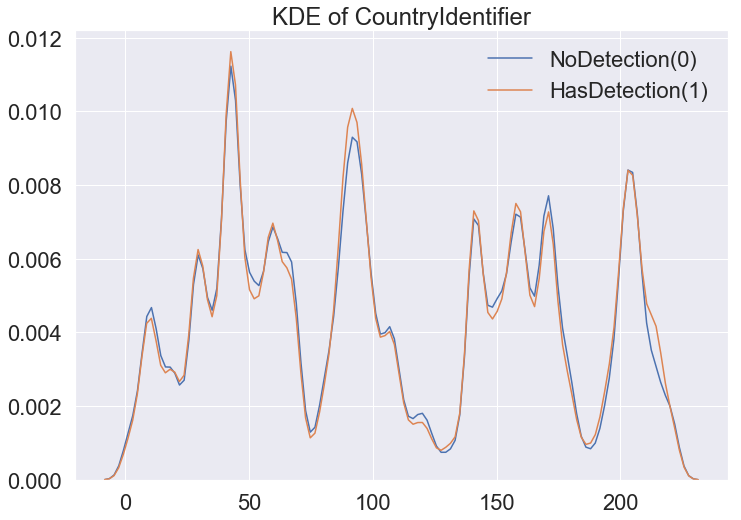

In [75]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.kdeplot(train_5.loc[train_5['HasDetections'] == 0, 'CountryIdentifier'], label='NoDetection(0)')
sns.kdeplot(train_5.loc[train_5['HasDetections'] == 1, 'CountryIdentifier'], label='HasDetection(1)')

plt.title('KDE of {}'.format('CountryIdentifier'))

Text(0.5,1,'KDE of GeoNameIdentifier')

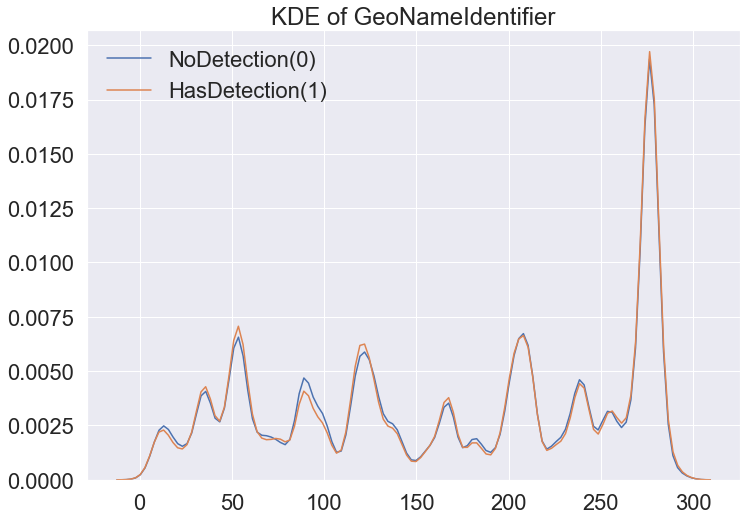

In [78]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.kdeplot(train_5.loc[train_5['HasDetections'] == 0, 'GeoNameIdentifier'], label='NoDetection(0)')
sns.kdeplot(train_5.loc[train_5['HasDetections'] == 1, 'GeoNameIdentifier'], label='HasDetection(1)')
plt.title('KDE of {}'.format('GeoNameIdentifier'))